<a href="https://colab.research.google.com/github/mshassanpour/clinical-data-science-projects/blob/main/notebooks/breast_cancer_tumor_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


**Project Name:** Breast Cancer Tumor Classification

**Project Objective:**  To train a model that can predict whether breast cancer tumors are malignant or benign based on tumor characteristics.



---




**Description: **
This dataset includes features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. It describes characteristics of the cell nuclei present in the image.

**Source:** UCI Machine Learning Repository

**Access:** Breast Cancer Wisconsin (Diagnostic) Dataset

**Data Characteristics:**

Features: 30 numeric features

Instances: 569

Target: Diagnosis (M = malignant, B = benign)

---
Attribute information:

1) ID number

2) Diagnosis (M = malignant, B = benign)

3- 12) include:

  a) radius (mean of distances from center to points on the perimeter)
  
  b) texture (standard deviation of gray-scale values)

  c) perimeter

  d) area

  e) smoothness (local variation in radius lengths)

  f) compactness (perimeter^2 / area - 1.0)

  g) concavity (severity of concave portions of the contour)

  h) concave points (number of concave portions of the contour)

  i) symmetry

  j) fractal dimension ("coastline approximation" - 1)

13-22 ) are the standard error in the measurement of each of the attributes above, indicating the variability or precision of the mean value.

23-32 ) are the largest value / worst of each attribute, which is the largest among all cell nuclei in the image of the tumor





In [ ]:
# Import Libraries:
import requests
import zipfile
import io
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, confusion_matrix, classification_report , accuracy_score
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier


# Data Collection and Preprocessing



---



---

Prepare Data


---



---



In [ ]:
# Download Data

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

columns = [
    'ID', 'Diagnosis',
    'Radius_mean', 'Texture_mean', 'Perimeter_mean', 'Area_mean', 'Smoothness_mean',
    'Compactness_mean', 'Concavity_mean', 'Concave_points_mean', 'Symmetry_mean',
    'Fractal_dimension_mean', 'Radius_se', 'Texture_se', 'Perimeter_se', 'Area_se',
    'Smoothness_se', 'Compactness_se', 'Concavity_se', 'Concave_points_se', 'Symmetry_se',
    'Fractal_dimension_se', 'Radius_worst', 'Texture_worst', 'Perimeter_worst', 'Area_worst',
    'Smoothness_worst', 'Compactness_worst', 'Concavity_worst', 'Concave_points_worst',
    'Symmetry_worst', 'Fractal_dimension_worst'
]

# Read the CSV file into a pandas DataFrame using the extracted column names
data = pd.read_csv(url, header=None, names=columns)

Download successful.
['dataset_diabetes/diabetic_data.csv', 'dataset_diabetes/IDs_mapping.csv']
   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton i

In [ ]:
# Look at Data
data.info()
print(data.describe())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   Radius_mean              569 non-null    float64
 3   Texture_mean             569 non-null    float64
 4   Perimeter_mean           569 non-null    float64
 5   Area_mean                569 non-null    float64
 6   Smoothness_mean          569 non-null    float64
 7   Compactness_mean         569 non-null    float64
 8   Concavity_mean           569 non-null    float64
 9   Concave_points_mean      569 non-null    float64
 10  Symmetry_mean            569 non-null    float64
 11  Fractal_dimension_mean   569 non-null    float64
 12  Radius_se                569 non-null    float64
 13  Texture_se               569 non-null    float64
 14  Perimeter_se             5

,ID,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


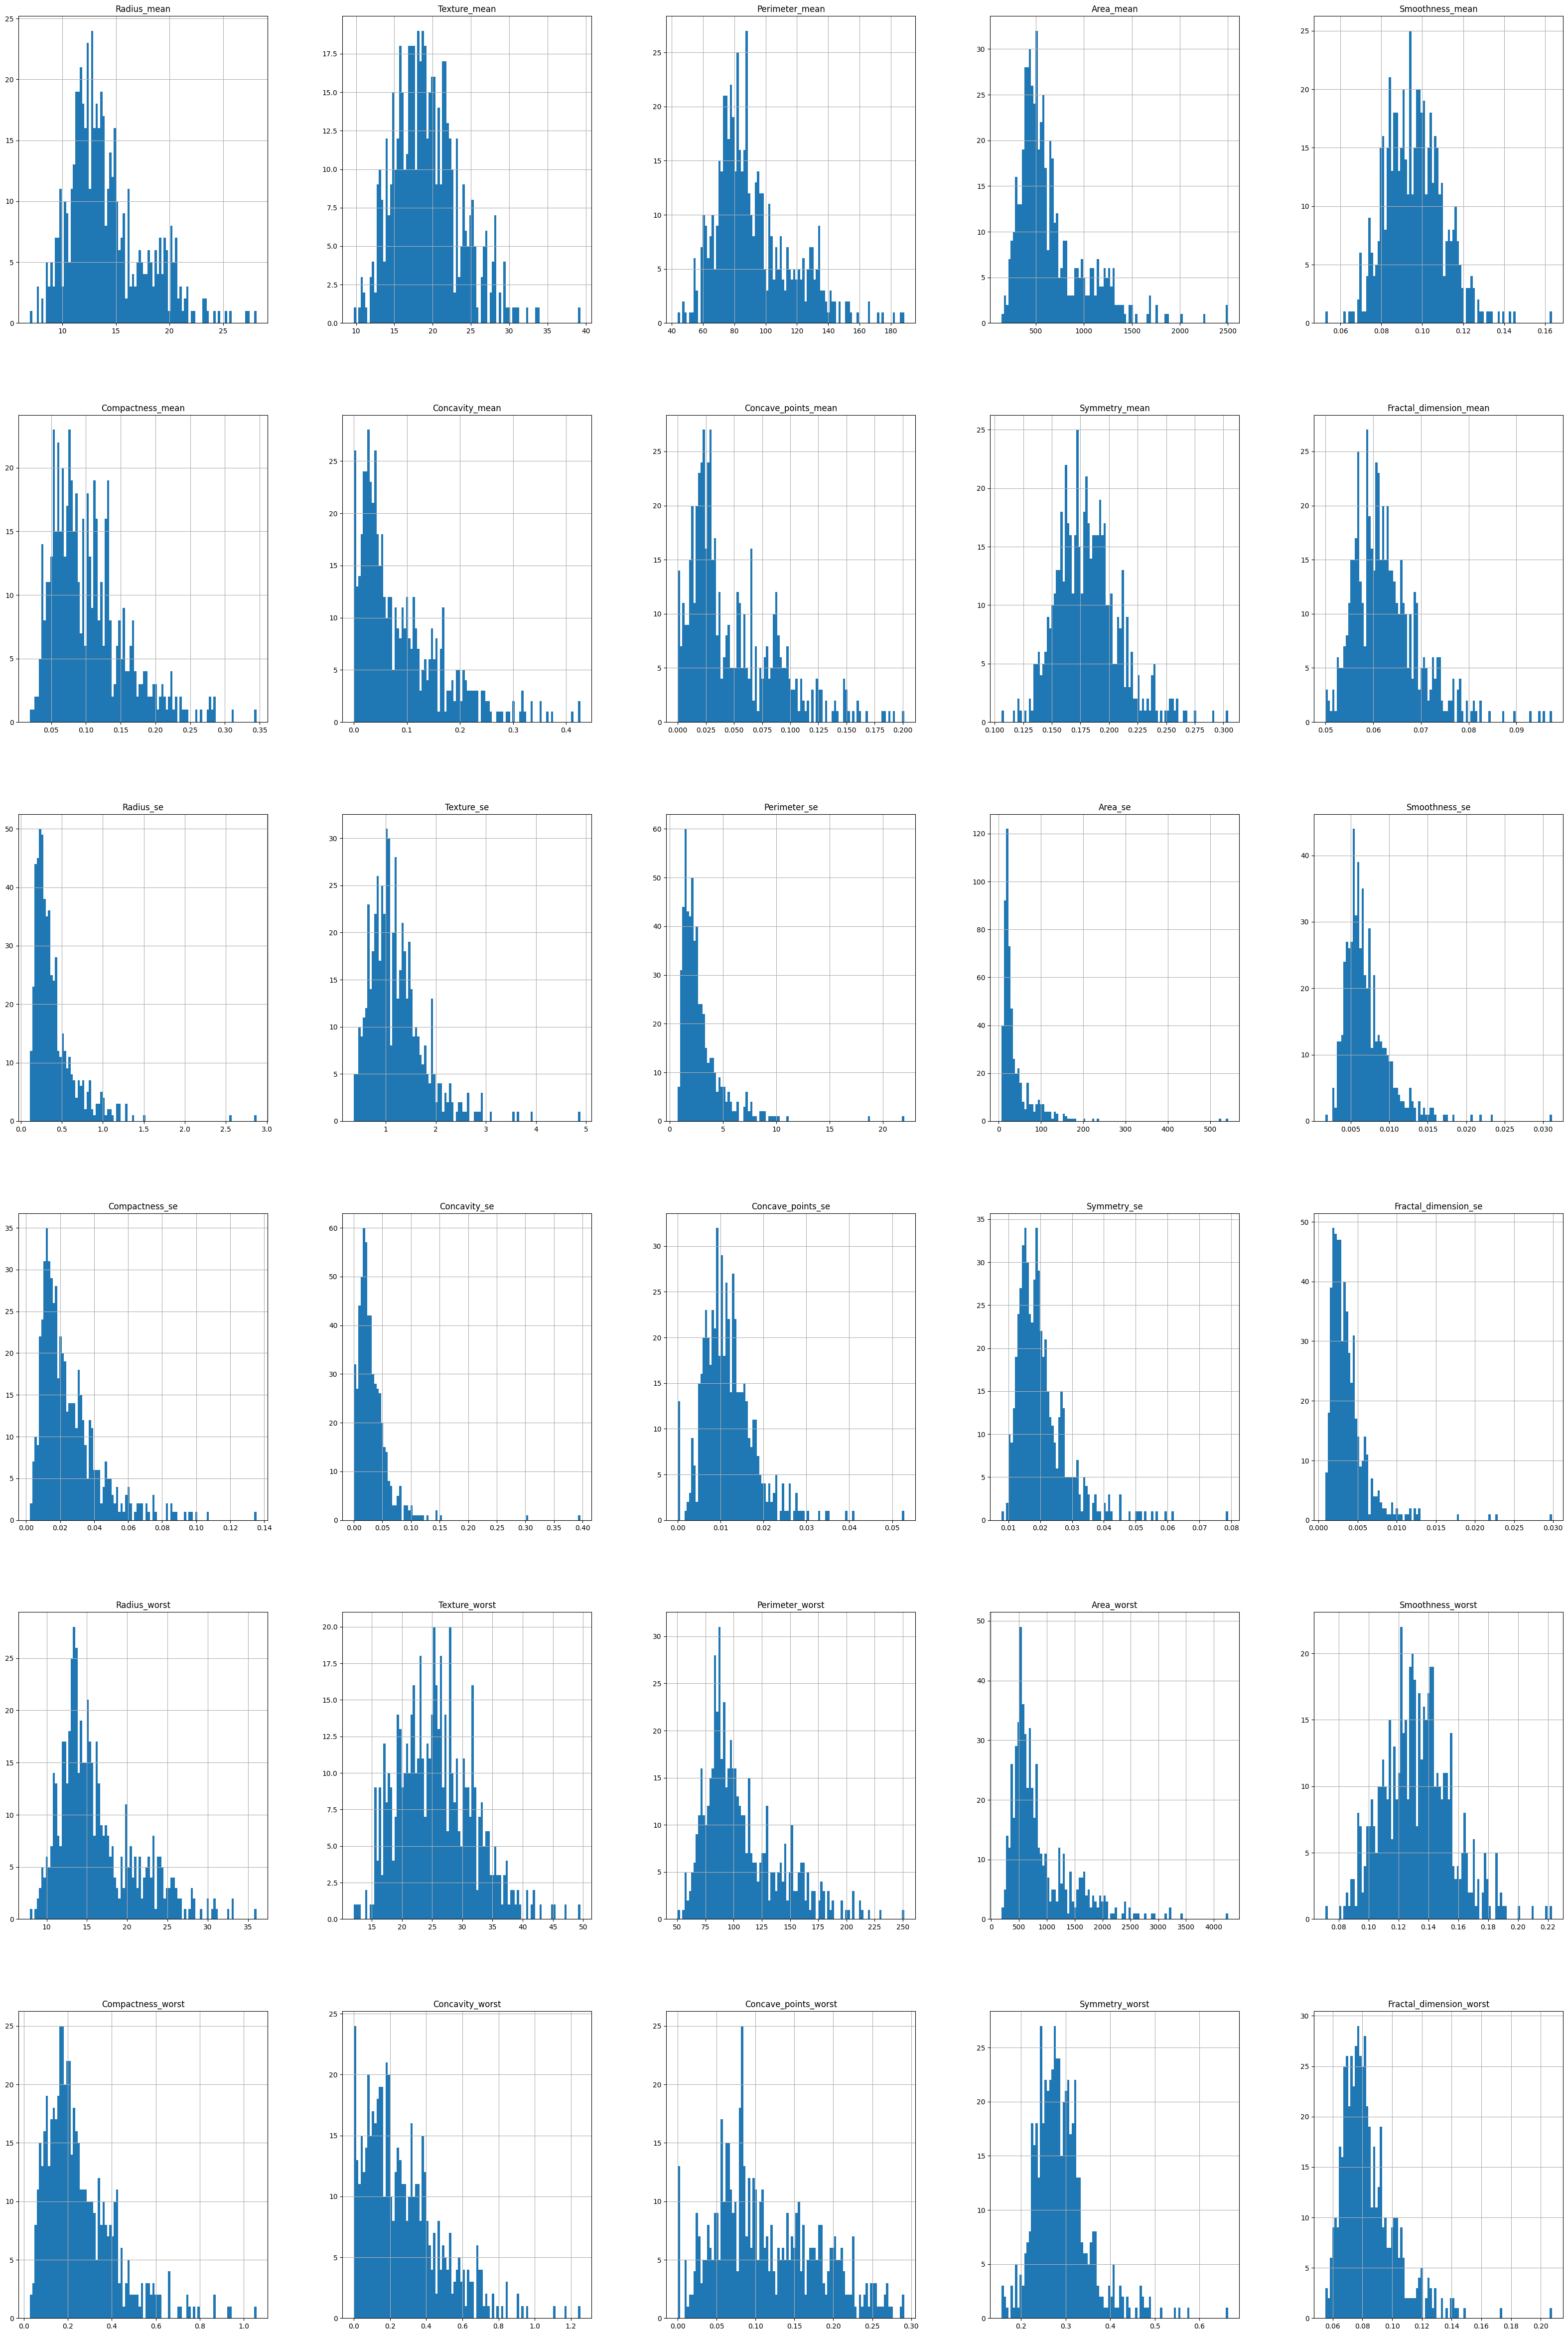

In [ ]:
# Visualize Data
data.drop(columns=['ID']).hist (bins = 100 , figsize=[40,60])
plt.show()

In [ ]:
# Split Data with
train_data, test_data= train_test_split(data, test_size=0.2, stratify=data["Diagnosis"], random_state=42)
print(train_data.shape)
print(test_data.shape)

(455, 32)
(114, 32)


In [ ]:
# Define Features and Target
feature_names = columns[2:]

test_data_features = test_data[columns[2:]]
train_data_features = train_data[columns[2:]]

test_data_features.shape
print(feature_names)


test_data_target = test_data[["Diagnosis"]]
train_data_target = train_data[["Diagnosis"]]


# check if the stratification has worked so there percentt of each diagnosis type is similar for test and train
print(test_data_target.value_counts()/len(test_data_target))
print(train_data_target.value_counts()/len(train_data_target))
print(data["Diagnosis"].value_counts()/len(data))

['Radius_mean', 'Texture_mean', 'Perimeter_mean', 'Area_mean', 'Smoothness_mean', 'Compactness_mean', 'Concavity_mean', 'Concave_points_mean', 'Symmetry_mean', 'Fractal_dimension_mean', 'Radius_se', 'Texture_se', 'Perimeter_se', 'Area_se', 'Smoothness_se', 'Compactness_se', 'Concavity_se', 'Concave_points_se', 'Symmetry_se', 'Fractal_dimension_se', 'Radius_worst', 'Texture_worst', 'Perimeter_worst', 'Area_worst', 'Smoothness_worst', 'Compactness_worst', 'Concavity_worst', 'Concave_points_worst', 'Symmetry_worst', 'Fractal_dimension_worst']
Diagnosis
B            0.631579
M            0.368421
Name: count, dtype: float64
Diagnosis
B            0.626374
M            0.373626
Name: count, dtype: float64
Diagnosis
B    0.627417
M    0.372583
Name: count, dtype: float64


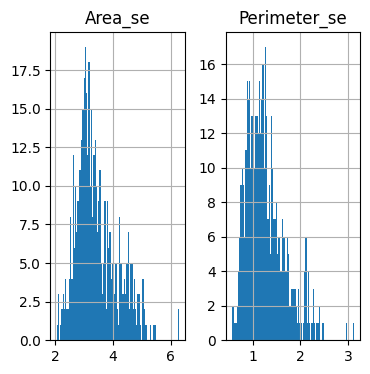

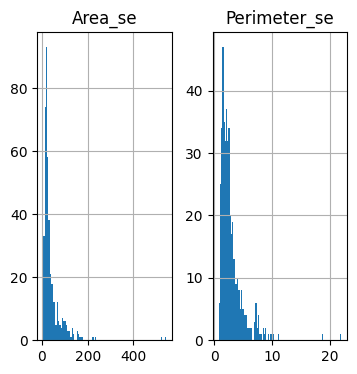

In [ ]:
# Transforming Heavy-tailed Features
heavy_tailed_features = ['Area_se','Perimeter_se'] # feattures with heavy tail

test_data_features_transformed = test_data_features.copy()
test_data_features_transformed[heavy_tailed_features] = np.log1p(test_data_features_transformed[heavy_tailed_features])


train_data_features_transformed = train_data_features.copy()
train_data_features_transformed[heavy_tailed_features] = np.log1p(train_data_features_transformed[heavy_tailed_features])

train_data_features_transformed[heavy_tailed_features].hist (bins = 100 , figsize=[4,4])
plt.show()


train_data_features[heavy_tailed_features].hist (bins = 100 , figsize=[4,4])
plt.show()

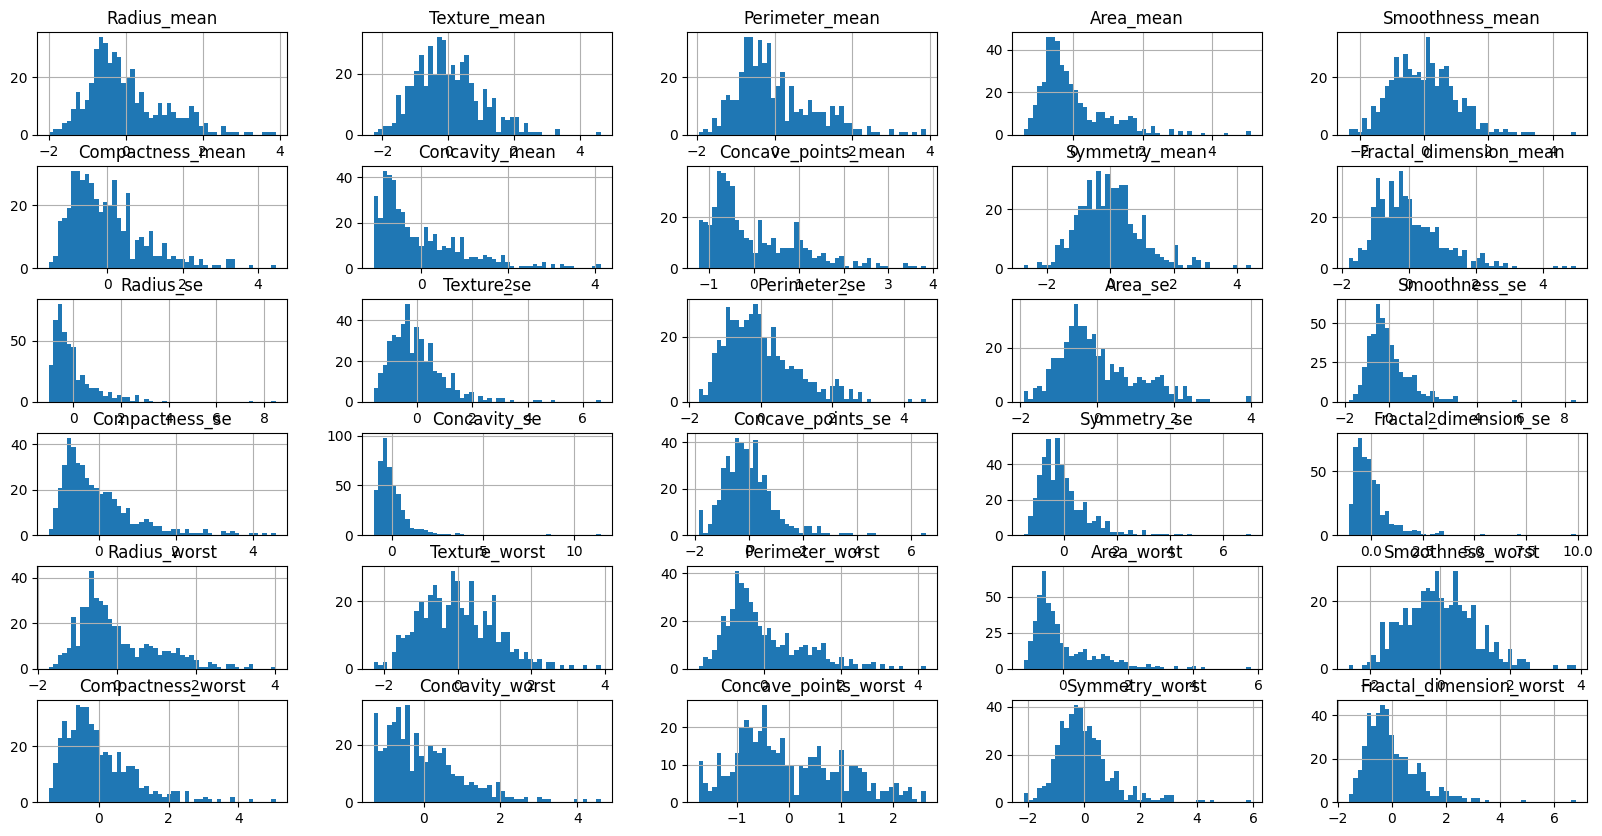

In [ ]:
# Feature Scaling
std_scaler = StandardScaler() # transformer for standarizing to have zero mean and std =1

# transform train data
train_data_features_transformed_standarized = std_scaler.fit_transform (train_data_features_transformed)
train_data_features_transformed_scaled_df = pd.DataFrame(train_data_features_transformed_standarized, columns=feature_names) # covert to dataFrame


# transform test data
test_data_features_transformed_standarized = std_scaler.transform (test_data_features_transformed)
test_data_features_transformed_scaled_df = pd.DataFrame(test_data_features_transformed_standarized, columns=feature_names) # covert to dataFrame


train_data_features_transformed_scaled_df.hist(bins=50,figsize=[20,10])
plt.show()

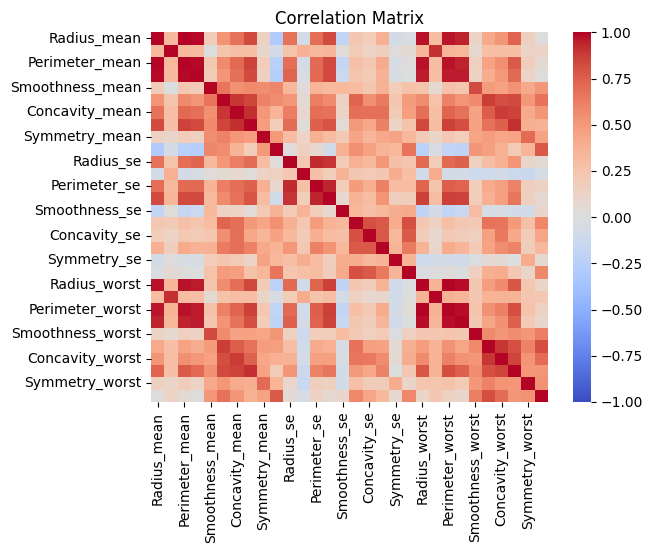

In [ ]:
# Look at correlations between features in test data
corr_matrix = train_data_features_transformed_scaled_df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmax=1, vmin=-1)
plt.title('Correlation Matrix')
plt.show()

Features that are highly correlated will be removed.

['Perimeter_mean', 'Area_mean', 'Concave_points_mean', 'Perimeter_se', 'Area_se', 'Radius_worst', 'Texture_worst', 'Perimeter_worst', 'Area_worst', 'Concave_points_worst']


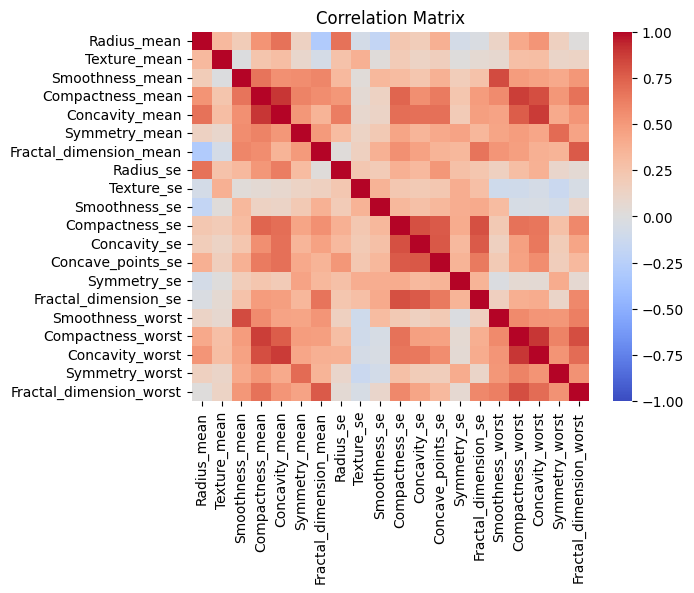

In [ ]:
# Drop Features that correlate
corr_th = 0.9; # High correlation threshold

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))# Select upper triangle of correlation matrix
to_drop = [column for column in upper.columns if any(upper[column] > corr_th)]
print( to_drop)

feature_names_to_keep = [item for item in feature_names if item not in to_drop]

# train and test feaures to keep
train_data_features_transformed_scaled_df_keep = train_data_features_transformed_scaled_df.drop(columns=to_drop)
test_data_features_transformed_scaled_df_keep = test_data_features_transformed_scaled_df.drop(columns=to_drop)


corr_matrix = train_data_features_transformed_scaled_df_keep.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmax=1, vmin=-1)
plt.title('Correlation Matrix')
plt.show()

# Model Development



---



---


**Train and Evaluate Logistic Regression Model**

In the following, I will start with Logistic Regression model for predicting whether the tumors are malignant or benign based on their measured features. I will test and evaluate and validate model in detecting malignant cases.



---




---





In [ ]:
# Model 1 : Logistic Regression
X= train_data_features_transformed_scaled_df_keep
y= train_data_target.squeeze()
y= y.map({'B': 0, 'M': 1}) # map targets to binary values

# train model
model = LogisticRegression(random_state=42)
reg =model.fit(X , y)


# prepare test data
X_new = test_data_features_transformed_scaled_df_keep
y_new = test_data_target.squeeze()
y_new = y_new.map({'B': 0, 'M': 1})# map targets to binary values

# apply model to test data
y_predict= model.predict(X_new)

# Define scoring functions explicitly for the positive class '1' (Malignant)
precision_scorer = make_scorer(precision_score, pos_label=1)
recall_scorer = make_scorer(recall_score, pos_label=1)
f1_scorer = make_scorer(f1_score, pos_label=1)

# evaluate model 1:

precision = precision_score( y_true=y_new, y_pred=y_predict)
accuracy = accuracy_score(y_new, y_predict)
conf_matrix = confusion_matrix(y_new, y_predict)

class_report = classification_report(y_new, y_predict)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.97
Precision: 1.00
Confusion Matrix:
[[72  0]
 [ 3 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114




**Observation 1:** Model performance is good. The Recall rate for Malignancy is 0.93.

---


**Next steps:**

***Step 1:*** Reducing the number of features by finding the most important features

***Step 2:*** Cross Validation

***Step 3:*** Evaluating the classification threshold

In [ ]:
# Find the most important features using Recursive Feature Elimination (RFE)
model2 =LogisticRegression(random_state=42)
rfe = RFE(model2, n_features_to_select=10) # 10 most important features will be selected

# Fit RFE
rfe.fit(X, y)

# Get the selected features
selected_features = np.array(feature_names_to_keep)[rfe.support_]
print("Selected Features:")
print(selected_features)

# Train model with the top 10 most important features
X2 = X[selected_features]
model2.fit(X2,y)

X_new2 = X_new[selected_features]

y_predict2= model2.predict(X_new2)

precision = precision_score( y_true=y_new, y_pred=y_predict2)
accuracy = accuracy_score(y_new, y_predict2)
conf_matrix = confusion_matrix(y_new, y_predict2 )
class_report = classification_report(y_new, y_predict2)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Selected Features:
['Radius_mean' 'Texture_mean' 'Concavity_mean' 'Fractal_dimension_mean'
 'Radius_se' 'Compactness_se' 'Concavity_se' 'Smoothness_worst'
 'Concavity_worst' 'Symmetry_worst']
Accuracy: 0.97
Precision: 0.98
Confusion Matrix:
[[71  1]
 [ 2 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114




**Observation 2 :** Using a subset of features slightly improved the recall rate from 0.93 to 0.95 while precision is slightly decreased  from 1 to 0.98 for malignant cases. Because in medical diagnosis recall is more critical than precision, this is considered an improvement in prediction.






# Model Validation



---




**Cross Validation**





In [ ]:
# Input matrix of selected features for Cross Validaion (CV)
X_cv = train_data_features_transformed [ selected_features ]


# Create a pipeline so scaling is done for each fold seperately
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))

# Perform stratified k-fold CV to ensure each fold contains a representative ratio of M and B diagnoses
n_splits = 5 # 5 fold cv
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform CV and evaluate using accuracy, precision, recall, and f1-score
accuracy_scores = cross_val_score(pipeline, X_cv, y, cv=skf, scoring='accuracy')
precision_scores = cross_val_score(pipeline, X, y, cv=skf, scoring='precision')
recall_scores = cross_val_score(pipeline, X, y, cv=skf, scoring='recall')
f1_scores = cross_val_score(pipeline, X, y, cv=skf, scoring='f1')


# Print the cross-validation results
print(f'Cross-Validation Accuracy: {accuracy_scores.mean():.2f} ± {accuracy_scores.std():.2f}')
print(f'Cross-Validation Precision: {precision_scores.mean():.2f} ± {precision_scores.std():.2f}')
print(f'Cross-Validation Recall: {recall_scores.mean():.2f} ± {recall_scores.std():.2f}')
print(f'Cross-Validation F1-Score: {f1_scores.mean():.2f} ± {f1_scores.std():.2f}')

Cross-Validation Accuracy: 0.98 ± 0.01
Cross-Validation Precision: 0.97 ± 0.04
Cross-Validation Recall: 0.95 ± 0.03
Cross-Validation F1-Score: 0.96 ± 0.01


57
 threshod for maximum mean f1-score : 0.58


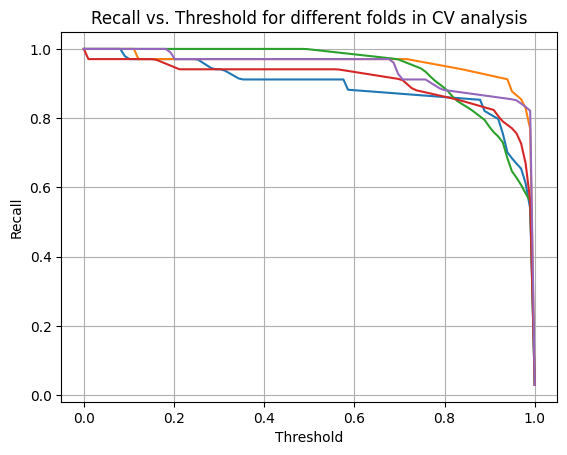

In [ ]:
#  Evaluating the classification threshold within CV analysis

# Initialize lists to store results
precision_list = []
recall_list = []
f1_list = []

# Define the desired thresholds
desired_thresholds = np.linspace(0, 1, 100)

for train_index, test_index in skf.split(X_cv, y):
    X_train, X_test = X_cv.iloc[train_index], X_cv.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Get the predicted probabilities
    y_probs = pipeline.predict_proba(X_test)[:, 1]

    # Calculate precision, recall, and thresholds
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

    # Interpolate precision and recall values to have them at desired thresholds
    precisions_interpolated = np.interp(desired_thresholds, thresholds, precisions[:-1])
    recall_interpolated = np.interp(desired_thresholds, thresholds, recalls[:-1])

    # Calculate F1 scores
    f1_scores = 2 * (precisions_interpolated * recall_interpolated) / (precisions_interpolated + recall_interpolated)

    # Store results
    precision_list.append(precisions_interpolated)
    recall_list.append(recall_interpolated)
    f1_list.append(f1_scores)


# Convert lists to arrays for easier manipulation
precision_array = np.array(precision_list)
recall_array = np.array(recall_list)
f1_array = np.array(f1_list)

# Find threshold that results in maximum F1 score averagged across folds
f1_mean= f1_array.mean(axis = 0) # average across folds
threshod_inedx = f1_mean.argmax()
print(threshod_inedx)
print(f' threshod for maximum mean f1-score : {desired_thresholds[threshod_inedx]:.2f}')

# plot interpolated recall and precision, and f1_array
for i in range(5):
  plt.plot(desired_thresholds,recall_array[i,:] )


plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall vs. Threshold for different folds in CV analysis')
plt.grid(True)
plt.show()
plt.show()


**Observation 3 :**
Threshold obtained from above analysis is higher than default threshold (0.5). So, I will stay with default threshold.

Let's look at recall and precision curves for training data


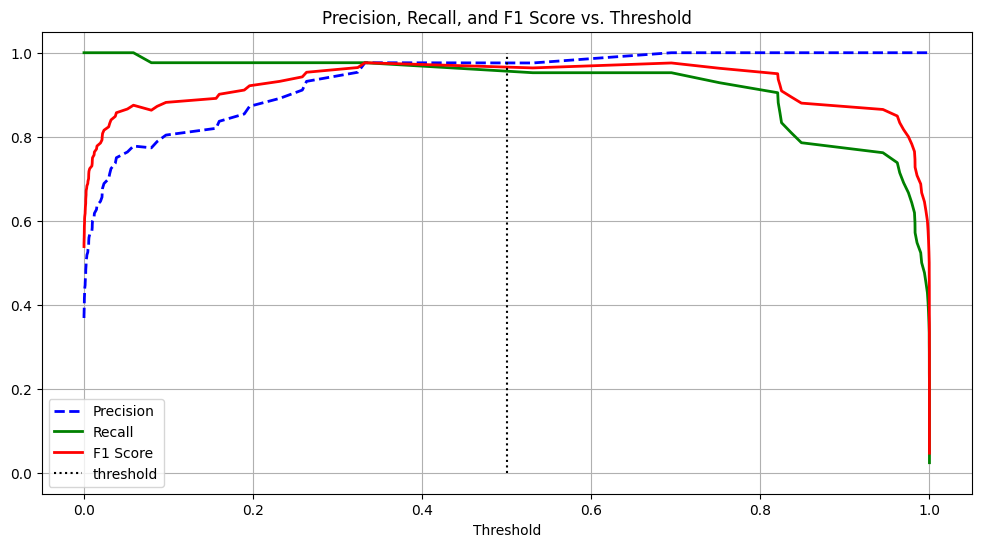

In [ ]:
# plot recall and percision curves for training data
threshold = 0.5 # default
model3 =LogisticRegression(random_state=42)
# Train model with the top 10 most important features
X2 = X[selected_features]
model3.fit(X2,y)
y_prob = model3.predict_proba(X_new2)[:, 1] # get predicted probabilities for Malignancy


precisions, recalls, thresholds = precision_recall_curve(y_new, y_prob) #get precisions andd recalls for different thresholds

# Calculate F1 scores for different thresholds
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

# Plot precision-recall curve
plt.figure(figsize=(12, 6))

plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.plot(thresholds, f1_scores[:-1], 'r-', label='F1 Score', linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

plt.legend()
plt.xlabel('Threshold')
plt.title('Precision, Recall, and F1 Score vs. Threshold')
plt.grid(True)
plt.show()


# Performace Comparison

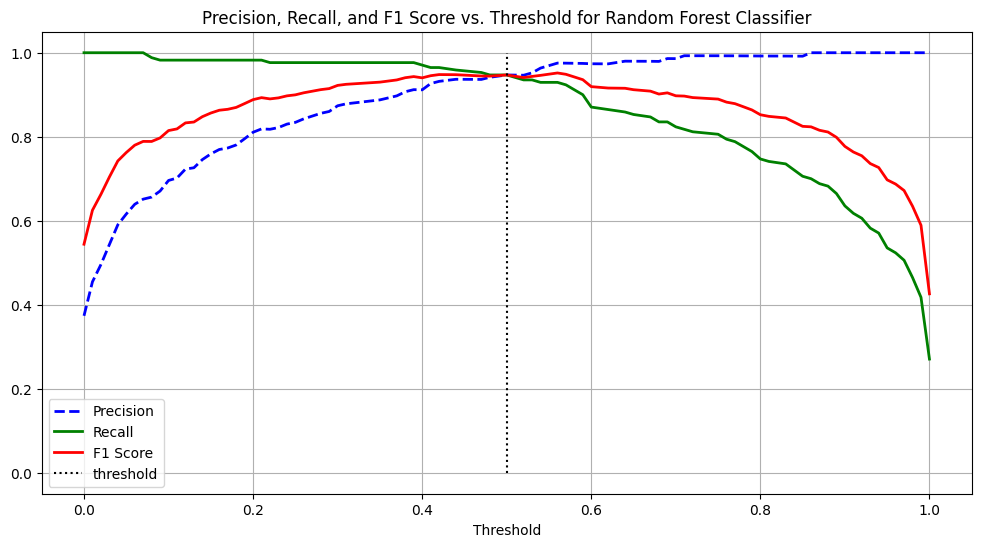

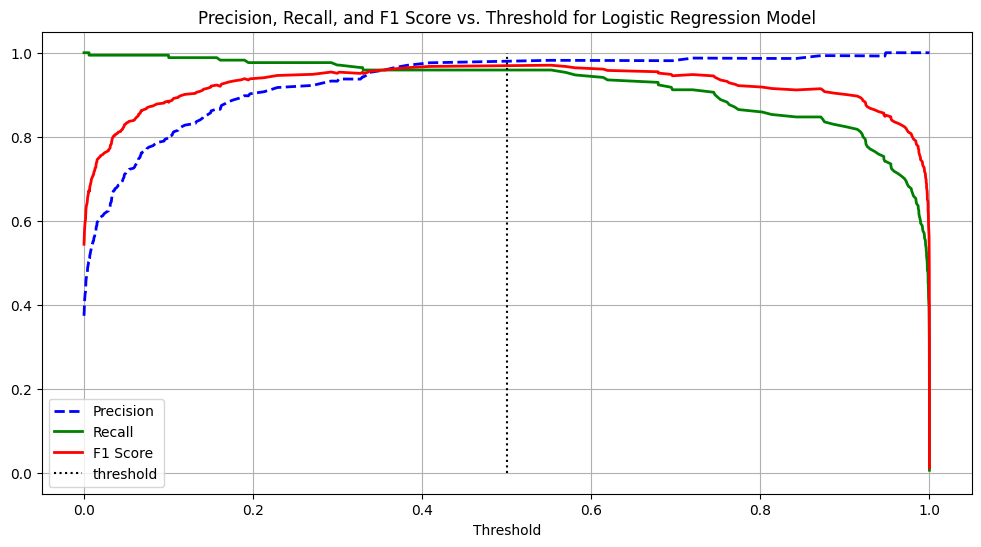

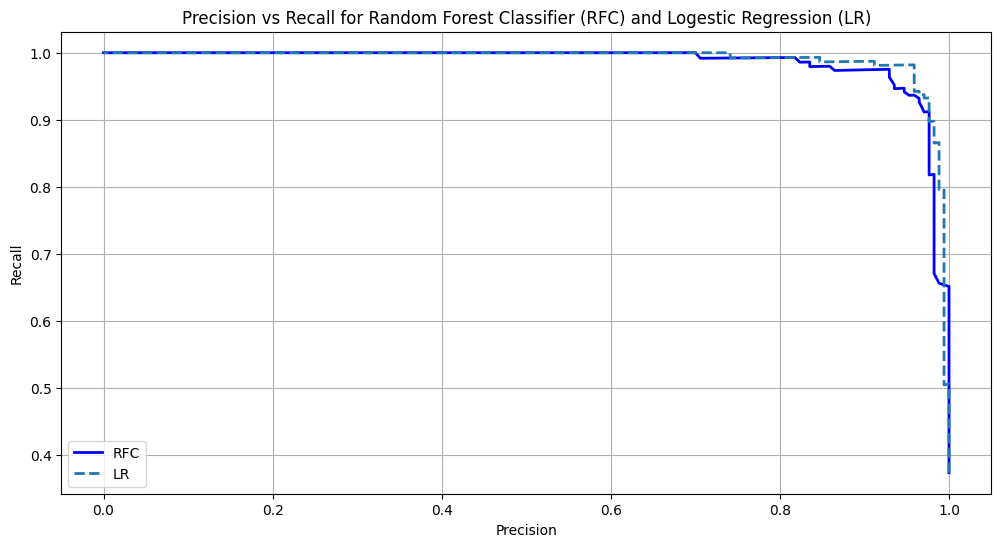

In [ ]:
# train random forest classifier
model_rfc = RandomForestClassifier(random_state=42)
model_lr = LogisticRegression (random_state= 42)

# Train model with the top 10 most important features
X2 = X[selected_features]

model_rfc.fit(X2,y)
model_lr.fit(X2,y)

# get predicted probabilities for Malignancy
y_probas_rfc = cross_val_predict(model_rfc, X2, y, cv=3, method="predict_proba")
y_probas_lr = cross_val_predict(model_lr, X2, y, cv=3, method="predict_proba")

#get precisions andd recalls for each model

precisions_rfc, recalls_rfc, thresholds_rfc = precision_recall_curve(y, y_probas_rfc[:, 1])
precisions_lr, recalls_lr, thresholds_lr = precision_recall_curve(y, y_probas_lr[:, 1])

# Calculate F1 scores for different thresholds
f1_scores_rfc = 2 * (precisions_rfc * recalls_rfc) / (precisions_rfc + recalls_rfc)
f1_scores_lr= 2 * (precisions_lr * recalls_lr) / (precisions_lr + recalls_lr)


# Plot precision-recall curve for RFC
plt.figure(figsize=(12, 6))

plt.plot(thresholds_rfc, precisions_rfc[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds_rfc, recalls_rfc[:-1], "g-", label="Recall", linewidth=2)
plt.plot(thresholds_rfc, f1_scores_rfc[:-1], 'r-', label='F1 Score', linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

plt.legend()
plt.xlabel('Threshold')
plt.title('Precision, Recall, and F1 Score vs. Threshold for Random Forest Classifier')
plt.grid(True)
plt.show()


# Plot precision-recall curve for LR
plt.figure(figsize=(12, 6))

plt.plot(thresholds_lr, precisions_lr[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds_lr, recalls_lr[:-1], "g-", label="Recall", linewidth=2)
plt.plot(thresholds_lr, f1_scores_lr[:-1], 'r-', label='F1 Score', linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

plt.legend()
plt.xlabel('Threshold')
plt.title('Precision, Recall, and F1 Score vs. Threshold for Logistic Regression Model')
plt.grid(True)
plt.show()


# Compare RFC with Logestic Regression model
plt.figure(figsize=(12, 6))
plt.plot(recalls_rfc, precisions_rfc, "b-", linewidth=2,
         label="RFC")
plt.plot(recalls_lr, precisions_lr, "--", linewidth=2, label="LR")
plt.legend()
plt.ylabel('Recall')
plt.xlabel ('Precision')
plt.title('Precision vs Recall for Random Forest Classifier (RFC) and Logestic Regression (LR)')
plt.grid(True)
plt.show()



# Model Optimization